  param_set  fold  f1_score  not_related_f1  related_f1
0         A     1  0.917816        0.941974    0.859198
1         B     1  0.910018        0.936279    0.846939
2         C     1  0.905819        0.933049    0.841254
3         A     2  0.913617        0.938514    0.854839
4         B     2  0.902220        0.929468    0.840665
5         C     2  0.895021        0.923279    0.833808
6         A     3  0.891957        0.923274    0.817444
7         B     3  0.920168        0.943138    0.866062
8         C     3  0.909364        0.934490    0.852970


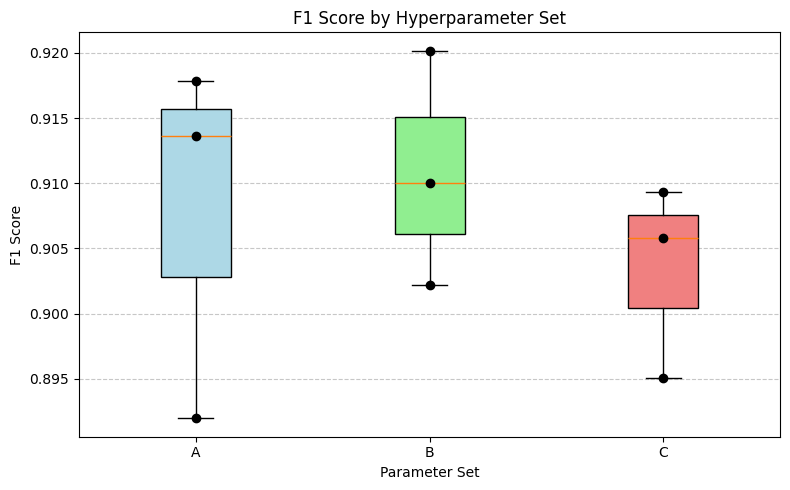

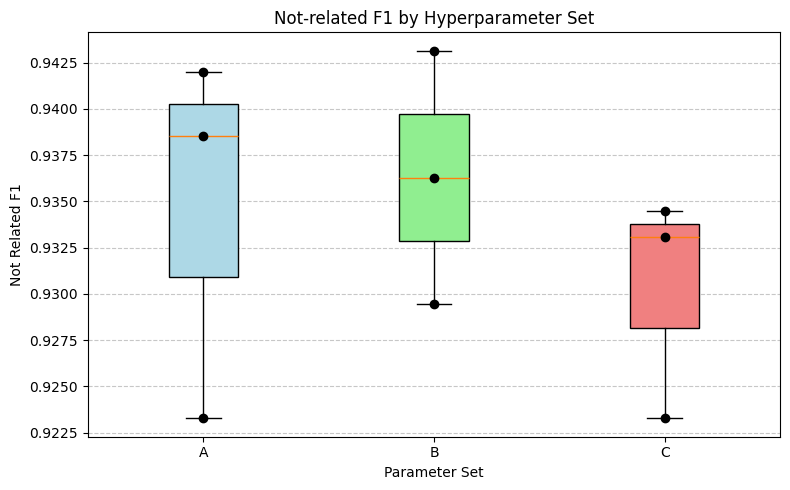

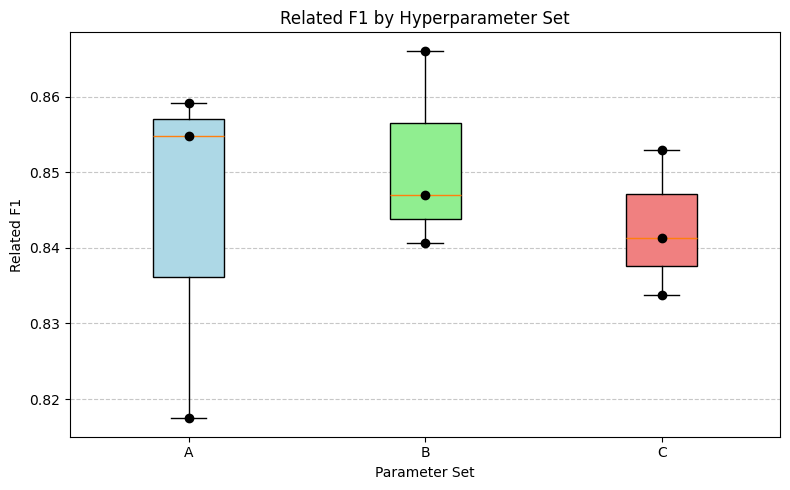

<BarContainer object of 2 artists>

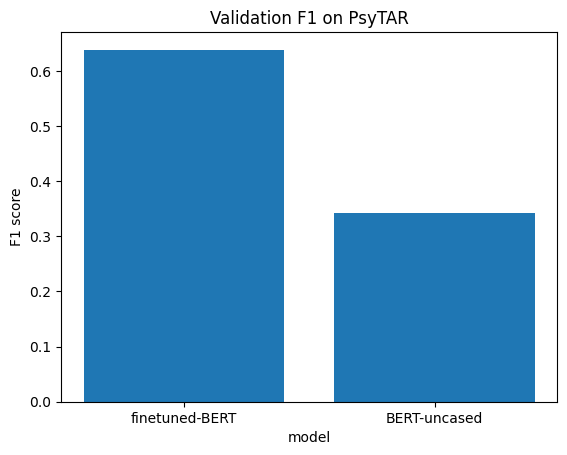

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("all_results.csv")
f1 = [float(m) for m in df["eval_f1_micro"].tolist()]
nrf1 = [float(m) for m in df["eval_not-related_f1-score"].tolist()]
rf1 = [float(m) for m in df["eval_related_f1-score"].tolist()]

data = pd.DataFrame(
    {
        "param_set": ["A", "B", "C", "A", "B", "C", "A", "B", "C"],
        "fold": [1, 1, 1, 2, 2, 2, 3, 3, 3],
        "f1_score": f1,
        "not_related_f1": nrf1,
        "related_f1": rf1,
    }
)
print(data)


def plot_metric_boxplot(data, metric_name, title):
    sets = ["A", "B", "C"]
    data_by_param = [data[data["param_set"] == s][metric_name].tolist() for s in sets]

    fig, ax = plt.subplots(figsize=(8, 5))
    box = ax.boxplot(data_by_param, labels=sets, patch_artist=True)

    colors = ["lightblue", "lightgreen", "lightcoral"]
    for patch, color in zip(box["boxes"], colors):
        patch.set_facecolor(color)

    for i, scores in enumerate(data_by_param):
        x = [i + 1] * len(scores)  # boxplot positions start at 1
        ax.scatter(x, scores, color="black", zorder=3)

    ax.set_title(title)
    ax.set_xlabel("Parameter Set")
    ax.set_ylabel(metric_name.replace("_", " ").title())
    ax.grid(True, axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


plot_metric_boxplot(data, "f1_score", "F1 Score by Hyperparameter Set")
plot_metric_boxplot(data, "not_related_f1", "Not-related F1 by Hyperparameter Set")
plot_metric_boxplot(data, "related_f1", "Related F1 by Hyperparameter Set")

y = [0.6386, 0.3417]
x = ["finetuned-BERT", "BERT-uncased"]
fig, ax = plt.subplots()
ax.set_title("Validation F1 on PsyTAR")
ax.set_xlabel("model")
ax.set_ylabel("F1 score")
plt.bar(x, y)